In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Loading Dataset

In [2]:
df=pd.read_csv(r"C:\Users\suresh biradar\Desktop\New folder (2)\ml\case study\diabetes_012_health_indicators_BRFSS2015.csv")

# Data Preprocessing

In [3]:
# showing the first five rows and all columns
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
print('shape of data :',df.shape)
print('total size of data :',df.size)

shape of data : (253680, 22)
total size of data : 5580960


In [5]:
# To see information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
# to see some basic statistical details like percentile, mean, std etc.
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
# Show the Columns
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
# to rename the some columns important of dataset
df.rename(columns={'Diabetes_012': 'Diabetes_Type'}, inplace=True)
df.head()

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
# It shows unique values of all columns
df.nunique()

Diabetes_Type            3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [10]:
# to see seperate column unique values
df['NoDocbcCost'].unique()

array([0., 1.])

In [11]:
df.GenHlth.unique()

array([5., 3., 2., 4., 1.])

Would say that in general your health isscale 1-5

1 = excellent

2 = very good

3 = Good

4 = fair

5 =Poor

In [12]:
df.Age.unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [12]:
# checking for null values
df.isnull().sum()

Diabetes_Type           0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# EDA(Exploratory Data Analysis)

<AxesSubplot:>

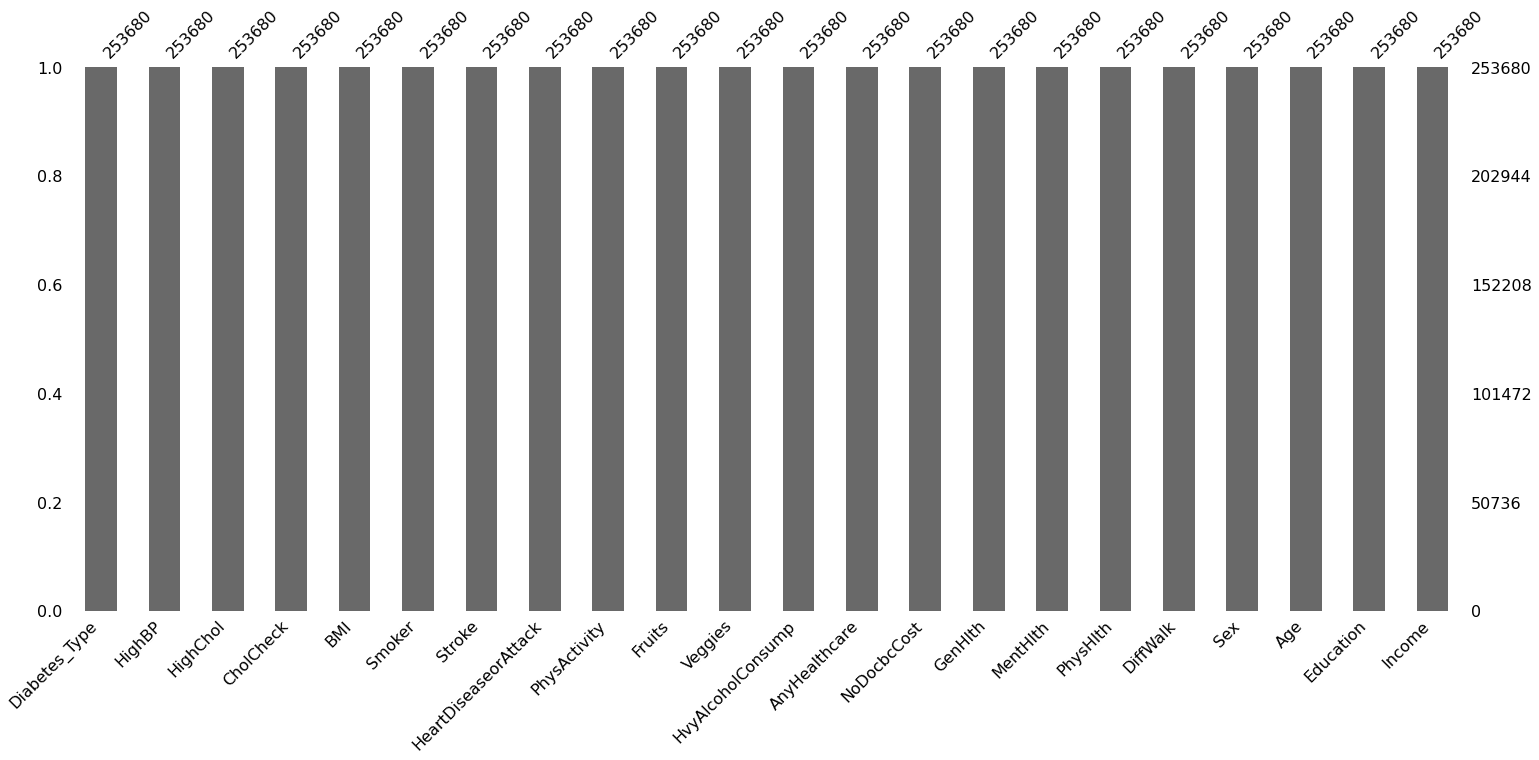

In [13]:
# to see missing values by bar graph
msno.bar(df)

In [14]:
# To see the target values count
df['Diabetes_Type'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_Type, dtype: int64

<AxesSubplot:xlabel='Diabetes_Type', ylabel='count'>

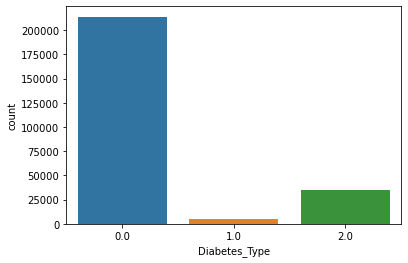

In [15]:
# To see vales count by graphically 
sns.countplot(x = 'Diabetes_Type',data = df)

# Here:

* 0: no Diabetes
* 1: pre Diabetec
* 3: Diabetec

 Clearly, more people has no diabetes.

C:\Users\suresh biradar\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:2844: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


<AxesSubplot:>

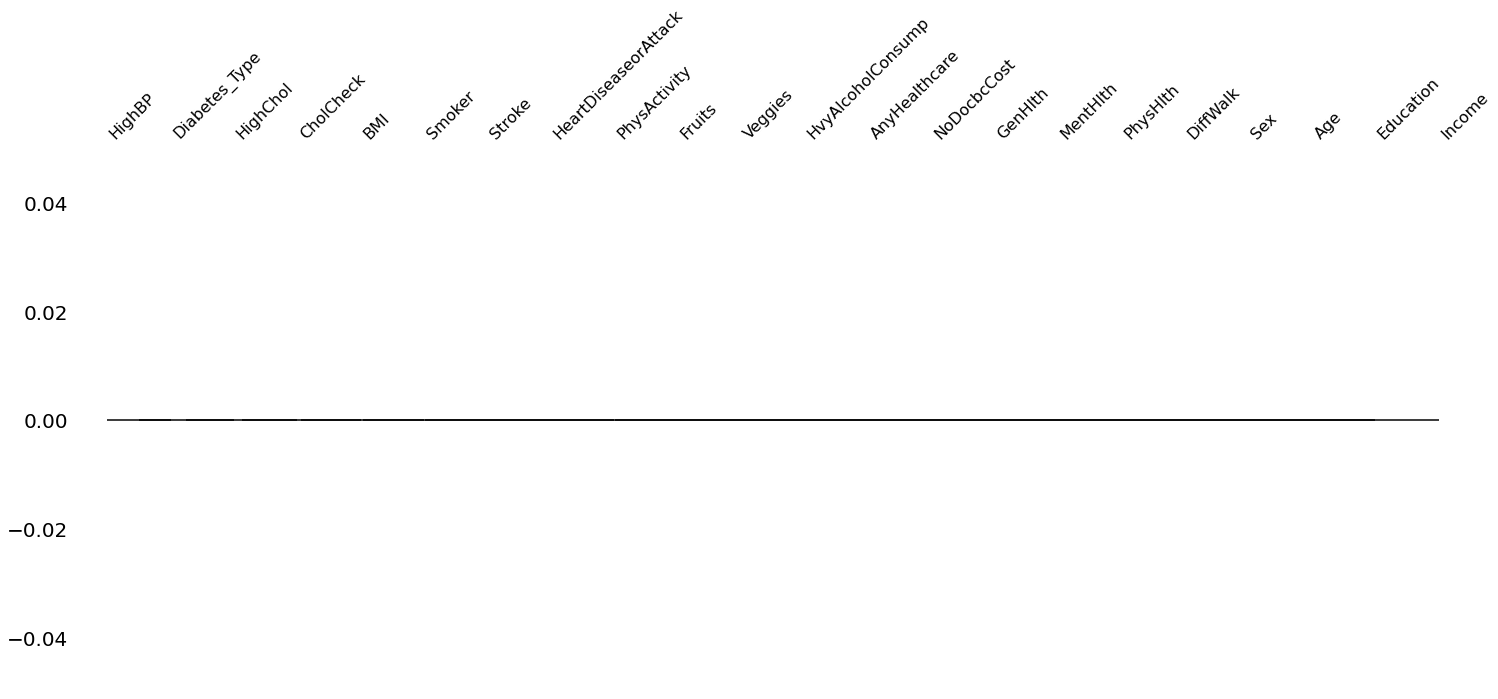

In [16]:
# A dendogram is a tree diagram of missingness. It groups the highly correlated variables together.
msno.dendrogram(df)

In [17]:
from scipy.stats import skew

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


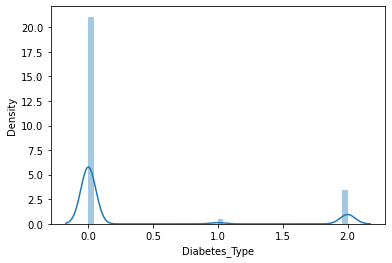

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


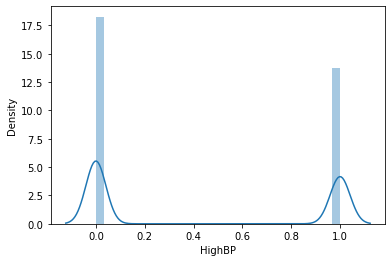

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


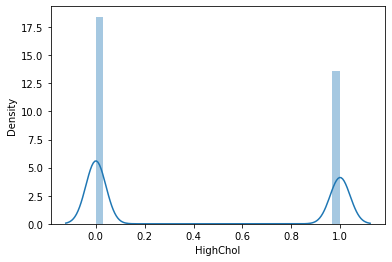

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


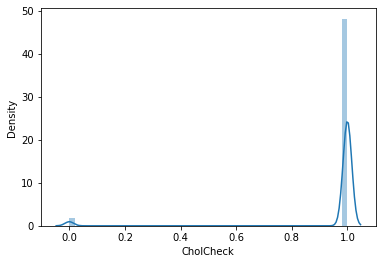

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


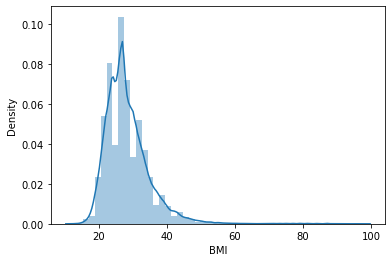

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


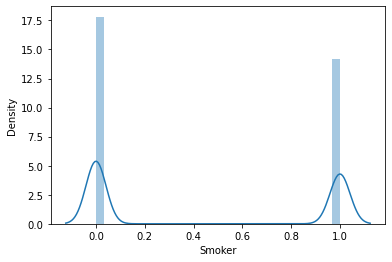

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


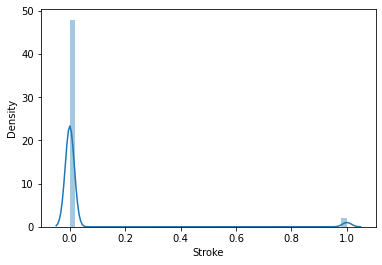

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


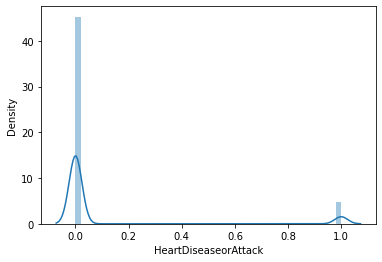

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


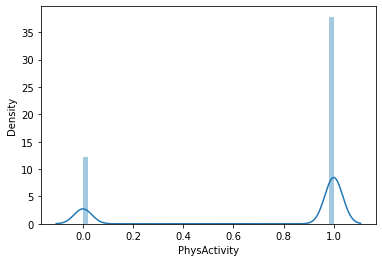

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


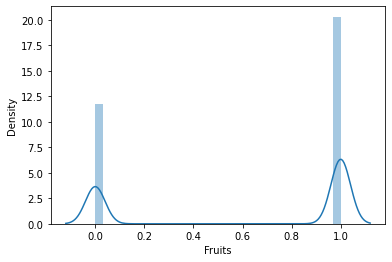

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


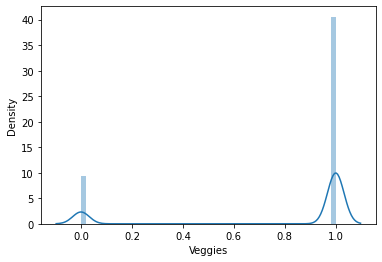

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


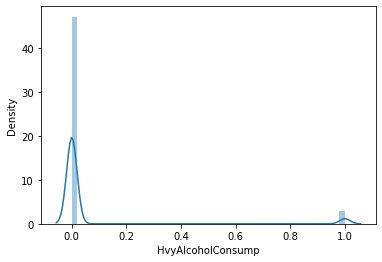

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


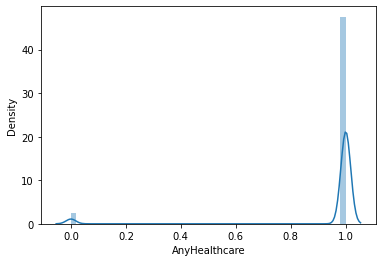

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


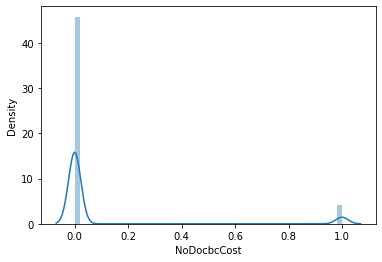

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


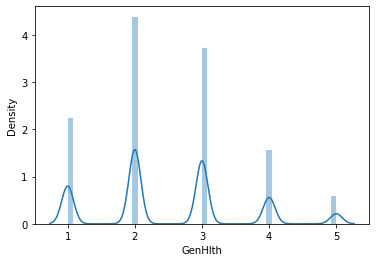

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


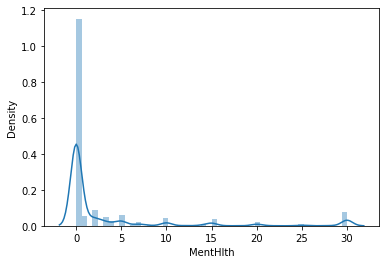

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


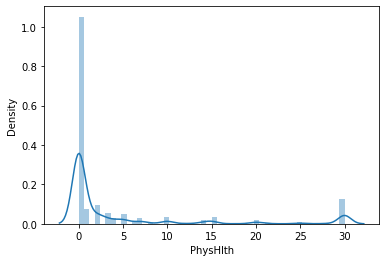

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


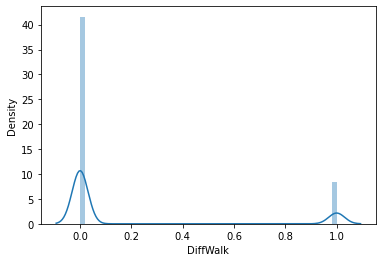

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


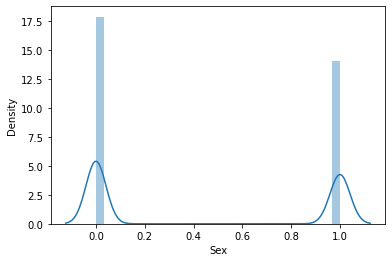

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


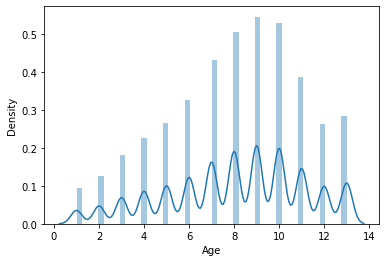

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


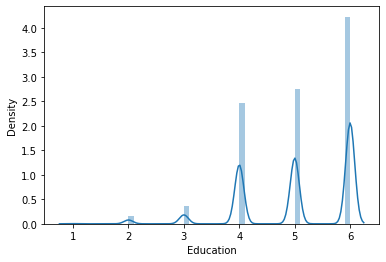

        Diabetes_Type  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                 0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                 0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                 0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                 0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                 0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...               ...     ...       ...        ...   ...     ...     ...   
253675            0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676            2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677            0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678            0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679            2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0            

C:\Users\suresh biradar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


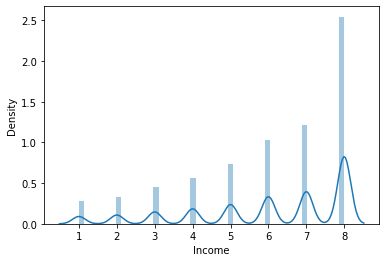

In [18]:
# Checking for Skewness
for col in df:
    print(df)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

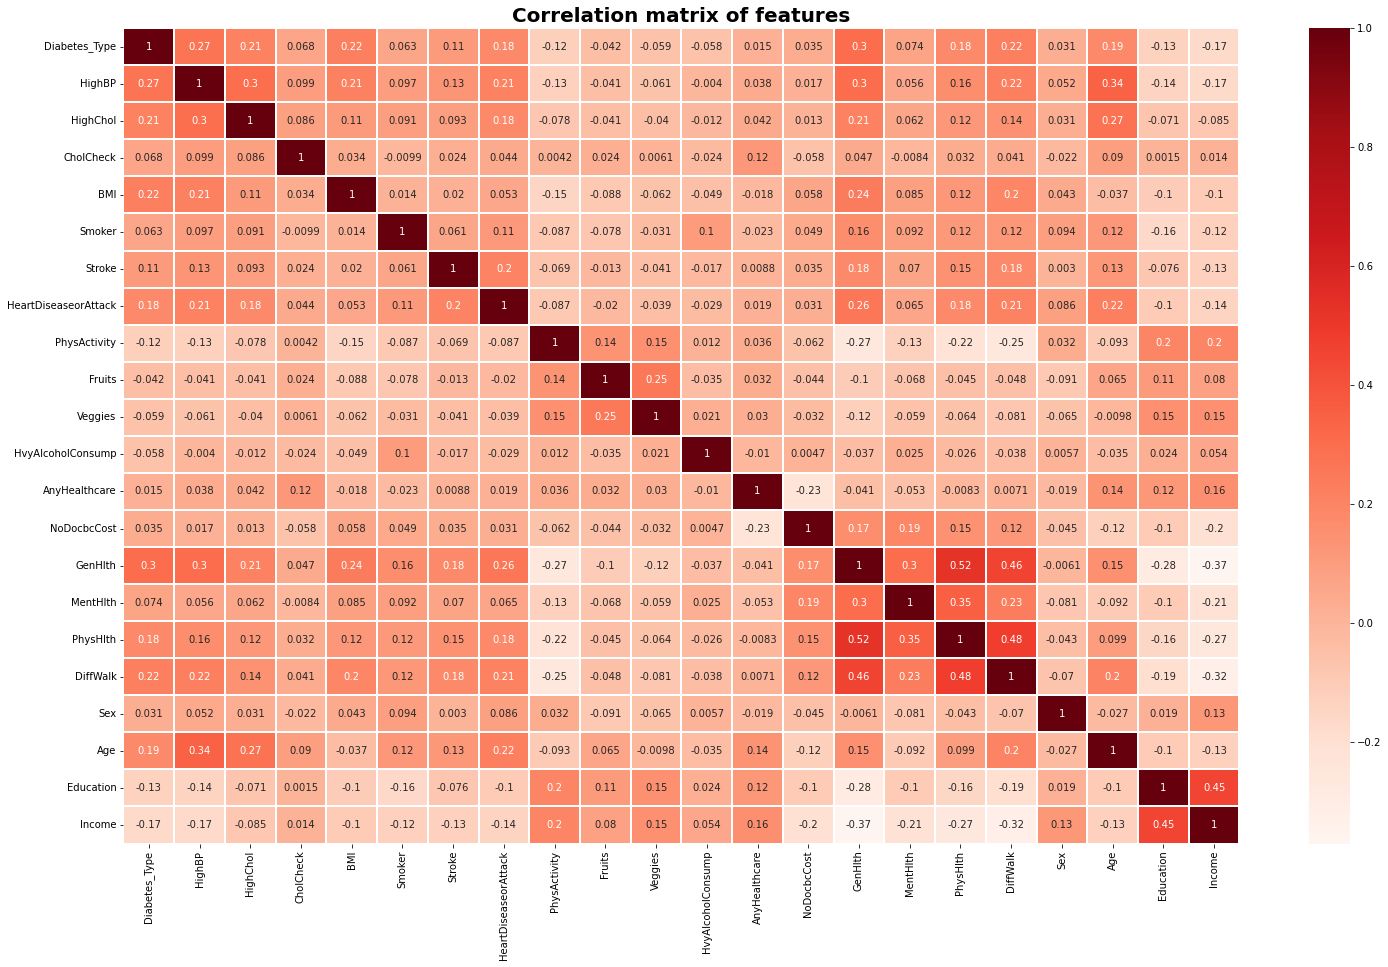

In [19]:
#correlation matrix plot using heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(25,15)) 
sns.heatmap(corr,annot=True, cmap = "Reds", linewidth = 0.30)
plt.title("Correlation matrix of features",fontweight="bold",fontsize=20)
plt.show()

In [20]:
#droping unneccesory columns
df.drop(['Education','Income'],axis=1,inplace=True)

In [21]:
df

,Diabetes_Type,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0


In [23]:
# Feature selection 
x=df.iloc[:,1:]
y=df.iloc[:,0:1]

In [24]:
#
x

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0


In [25]:
y

,Diabetes_Type
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
253675,0.0
253676,2.0
253677,0.0
253678,0.0


# Model Selection

In [26]:
# Splitting Data Into Training and Testing Where we can Train the Model and Test That Model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [27]:
# Using standardization To normalize data
from sklearn.preprocessing import StandardScaler    
sd= StandardScaler()    
x_train= sd.fit_transform(x_train)    
x_test= sd.transform(x_test)  

In [28]:
# Using Logistic regression To Train and Test data
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=1)  
classifier.fit(x_train, y_train)

C:\Users\suresh biradar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=1)

In [29]:
# Fitting the Model on Test Data
y_pred= classifier.predict(x_test)

In [30]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

Accuracy 0.8462235887732577
Confusion Matrix [[41757     0  1041]
 [  801     0    72]
 [ 5888     0  1177]]


C:\Users\suresh biradar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


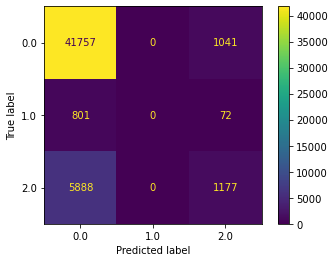

In [31]:
# Plotting confusion Matrix to see true table and Checking accuracy.
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
ac = accuracy_score(y_test,y_pred)
print('Accuracy', ac)
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix', cm)
plot_confusion_matrix(classifier, x_test, y_test)

In [32]:
ac

0.8462235887732577

In [33]:
# Importing Random Forest 
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Importing Decision Treeclassifier Model
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [35]:
# Fitting the Model on Test Data
y_pred = classifier.predict(x_test)

In [36]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

Accuracy 0.7850441501103753
Confusion Matrix [[37721   758  4319]
 [  661    25   187]
 [ 4745   236  2084]]


C:\Users\suresh biradar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


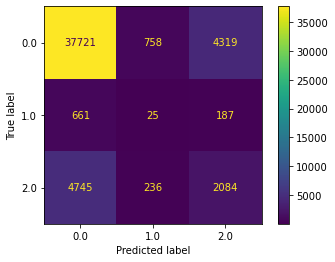

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
ac = accuracy_score(y_test,y_pred)
print('Accuracy', ac)
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix', cm)
plot_confusion_matrix(classifier, x_test, y_test)

In [38]:
dt=RandomForestClassifier(criterion='entropy', max_depth=12,random_state=13)
dt.fit(x_train,y_train)

C:\Users\suresh biradar\AppData\Local\Temp\ipykernel_8284\3284273533.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=12, random_state=13)

In [39]:
y_pred = dt.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

Accuracy 0.8490815200252286
Confusion Matrix [[42242     0   556]
 [  816     0    57]
 [ 6228     0   837]]


C:\Users\suresh biradar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


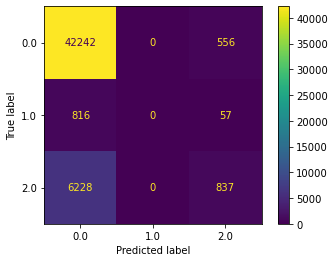

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
ac = accuracy_score(y_test,y_pred)
print('Accuracy', ac)
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix', cm)
plot_confusion_matrix(dt, x_test, y_test)

In [41]:
from sklearn.svm import SVC
sv=SVC(probability=True,kernel='linear')
sv.fit(x_test,y_test)
sv.score(x_test,y_test)

C:\Users\suresh biradar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8435430463576159